In [4]:
# the following packages can be used to extract features from audio data
from pyAudioAnalysis import audioBasicIO as abio
from pyAudioAnalysis import ShortTermFeatures as stf
from pydub import AudioSegment
import librosa
import librosa.display
# you may use other packages too.
import os,glob,eyed3
import pandas as pd
import numpy as np


from sklearn import cluster


pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt

In [5]:
cw = os.getcwd()
os.listdir(cw)

data = cw + '/data'
fils = os.listdir(data)
fils = tuple(fils)

In [15]:

feats = pd.read_csv('feature_set.csv',header=[0,1,2])
feats = feats.set_index(feats.columns[0])
feats

chroma_cens                                \
                                 kurtosis                                 
                                       01        02        03        04   
(feature, statistics, number)                                             
0                               -0.371332  0.033316  0.280583  1.221006   
1                                2.431309 -0.701034 -0.599058 -0.723412   
2                                1.938045  0.291241  1.248885 -0.056932   
3                                1.974653 -0.038609 -0.047155 -0.590124   
4                               -0.648081 -0.278046 -0.520639 -0.739611   
...                                   ...       ...       ...       ...   
85                               0.009023  0.299104  0.026383 -0.706047   
86                               0.204764 -0.833226 -0.919060 -0.935129   
87                              -1.034451  0.245840 -0.405058  0.246232   
88                              -1.000784 -0.163925  0.159248 -0.185568   
89                              -0.701113 -0.086331 -0.948332 -0.833377   

                                                                       \
                                                                        
                                     05        06        07        08   
(feature, statistics, number)                                           
0                              0.371610 -0.587465 -0.942494 -1.002133   
1                             -0.218545 -0.035764  0.302542  0.267308   
2                             -0.434033 -0.158136 -0.206080  0.075225   
3                              0.729950 -0.805870 -0.795872 -0.002026   
4                             -0.597592  0.610723 -0.406698  0.031583   
...                                 ...       ...       ...       ...   
85                            -0.295000  0.020247 -0.383799 -0.089401   
86                            -0.254850  0.701667 -1.101793 -1.015899   
87                            -0.576097 -0.480972 -1.117766  0.475257   
88                             0.588360 -0.404090  0.666972  0.817534   
89                            -0.728301  0.519564  0.205120 -0.842308   

                                                                       \
                                                                        
                                     09        10        11        12   
(feature, statistics, number)                                           
0                              1.700059  0.133831 -0.989182 -0.617790   
1                              0.422103 -0.051525  0.268163  0.455092   
2                             -0.656558  0.132843 -0.573856  2.503376   
3                             -0.517309 -0.849433 -0.921587  3.064209   
4                             -0.253484 -0.050135  0.695594 -0.754319   
...                                 ...       ...       ...       ...   
85                            -0.135325  0.651826 -0.537588 -0.774158   
86                            -1.168807  1.059893 -0.200050  2.158769   
87                            -1.103677 -0.125222 -0.794122 -1.243121   
88                            -0.891178 -0.849103  3.533587  0.539222   
89                            -1.125524 -0.139352 -0.963818 -1.108550   

                                                                       \
                                    max                                 
                                     01        02        03        04   
(feature, statistics, number)                                           
0                              0.686195  0.642466  0.660841  0.622677   
1                              0.721947  0.512168  0.545834  0.584512   
2                              0.659792  0.599739  0.687972  0.502656   
3                              0.693670  0.640284  0.712163  0.535815   
4                              0.653399  0.563665  0.539257  0.519335   
...                                 ...       ...      

LLE: 0.03 sec
LTSA: 0.028 sec
Hessian LLE: 0.042 sec
Modified LLE: 0.03 sec
Isomap: 0.011 sec
MDS: 0.028 sec
SE: 0.013 sec
t-SNE: 0.47 sec


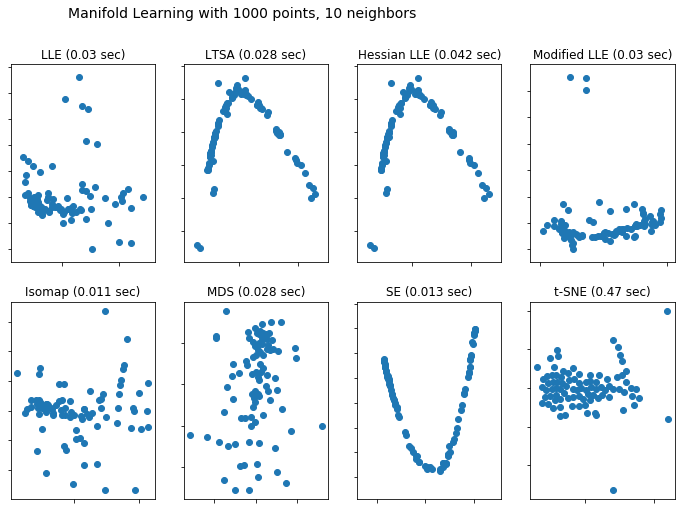

In [25]:
from functools import partial
from sklearn import manifold
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

n_neighbors = 10
n_components = 2



# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(feats)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
x = scaler.fit_transform(feats)

LLE: 0.033 sec
LTSA: 0.036 sec
Hessian LLE: 0.046 sec
Modified LLE: 0.035 sec
Isomap: 0.012 sec
MDS: 0.03 sec
SE: 0.014 sec
t-SNE: 0.4 sec


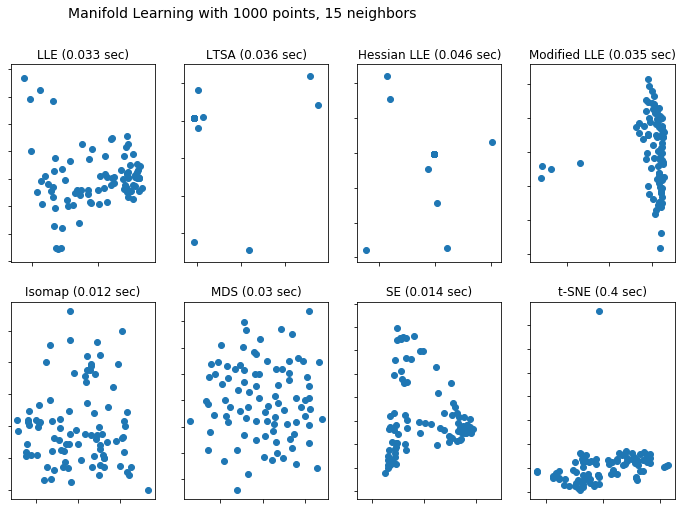

In [49]:
from functools import partial
from sklearn import manifold
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

n_neighbors = 15
n_components = 2



# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa',eigen_solver ='dense')
methods['Hessian LLE'] = LLE(method='hessian',eigen_solver ='dense')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0,perplexity = 5)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(x)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()



For n_clusters = 2 The average silhouette_score is : 0.46422944898313584
For n_clusters = 3 The average silhouette_score is : 0.5228266524449948
For n_clusters = 4 The average silhouette_score is : 0.4910755193203278
For n_clusters = 5 The average silhouette_score is : 0.48365017541114974
For n_clusters = 6 The average silhouette_score is : 0.49135368823652165
For n_clusters = 2 The average silhouette_score is : 0.945485512499158
For n_clusters = 3 The average silhouette_score is : 0.976617488179038
For n_clusters = 4 The average silhouette_score is : 0.9639620724958605
For n_clusters = 5 The average silhouette_score is : 0.9468379530894945
For n_clusters = 6 The average silhouette_score is : 0.9298815693411592
For n_clusters = 2 The average silhouette_score is : 0.9086871956508471
For n_clusters = 3 The average silhouette_score is : 0.9346110210986447
For n_clusters = 4 The average silhouette_score is : 0.9390053937175474
For n_clusters = 5 The average silhouette_score is : 0.95021309

/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

For n_clusters = 2 The average silhouette_score is : 0.4561669265692434
For n_clusters = 3 The average silhouette_score is : 0.5008230185926043
For n_clusters = 4 The average silhouette_score is : 0.46713607886672964
For n_clusters = 5 The average silhouette_score is : 0.4414162120417272


/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

For n_clusters = 6 The average silhouette_score is : 0.4465782865030026
For n_clusters = 2 The average silhouette_score is : 0.36768442603460055
For n_clusters = 3 The average silhouette_score is : 0.34468699492905386


/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

For n_clusters = 4 The average silhouette_score is : 0.3593105192487893
For n_clusters = 5 The average silhouette_score is : 0.34246638530293294
For n_clusters = 6 The average silhouette_score is : 0.3435198555030337


/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

For n_clusters = 2 The average silhouette_score is : 0.4956542495155386
For n_clusters = 3 The average silhouette_score is : 0.6568550945319919
For n_clusters = 4 The average silhouette_score is : 0.5825312892967945
For n_clusters = 5 The average silhouette_score is : 0.5060464308605727


/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 6 The average silhouette_score is : 0.47290298430502037


/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

For n_clusters = 2 The average silhouette_score is : 0.8709966
For n_clusters = 3 The average silhouette_score is : 0.48691708
For n_clusters = 4 The average silhouette_score is : 0.43323028


/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/isaiahvalencia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 5 The average silhouette_score is : 0.44656113
For n_clusters = 6 The average silhouette_score is : 0.45026267


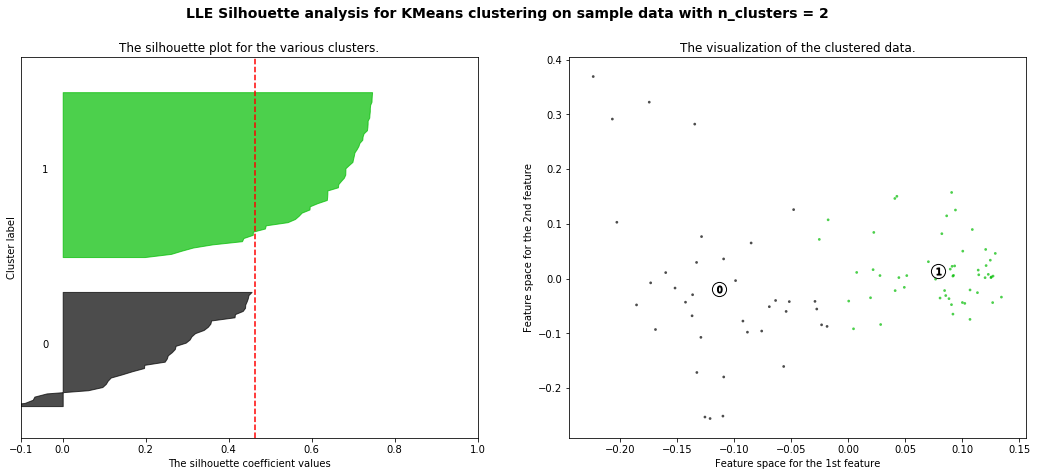

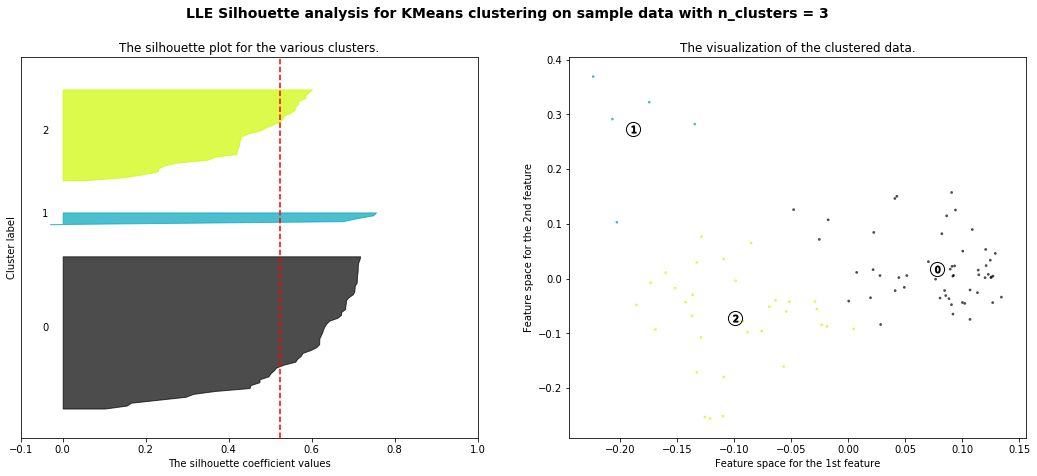

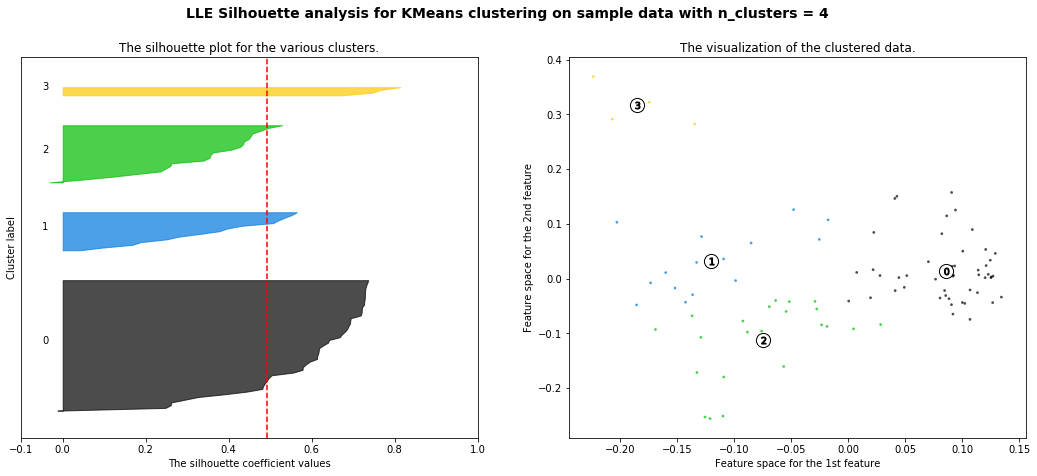

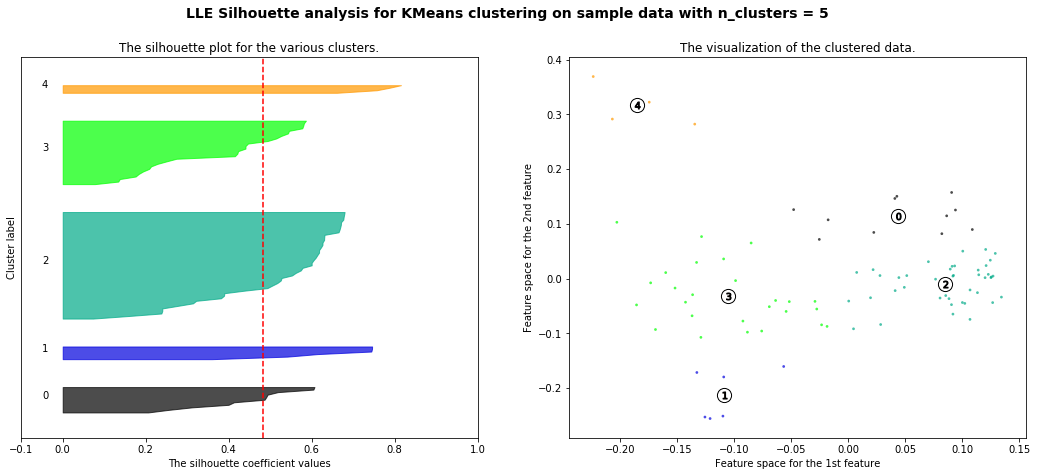

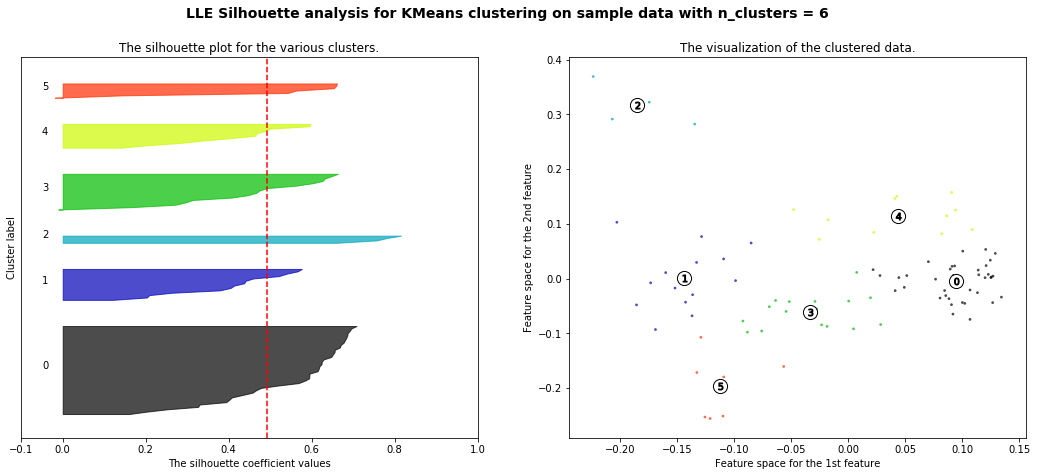

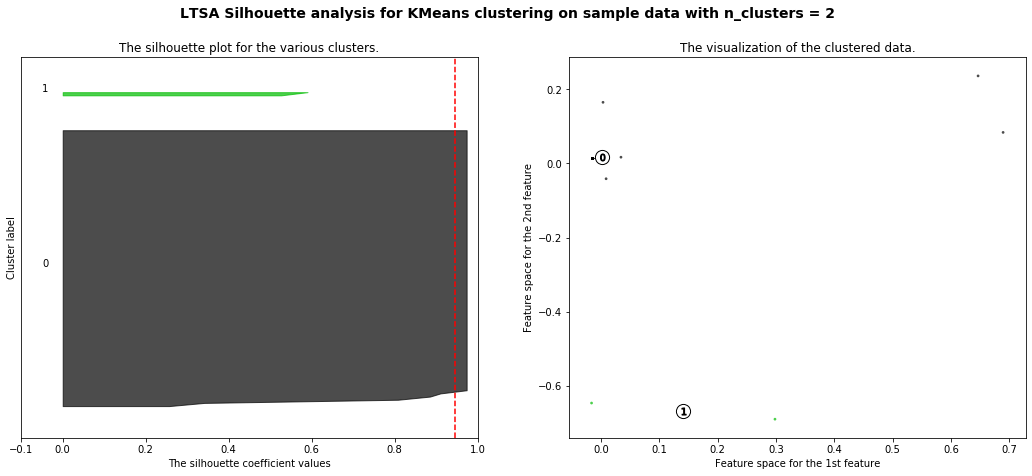

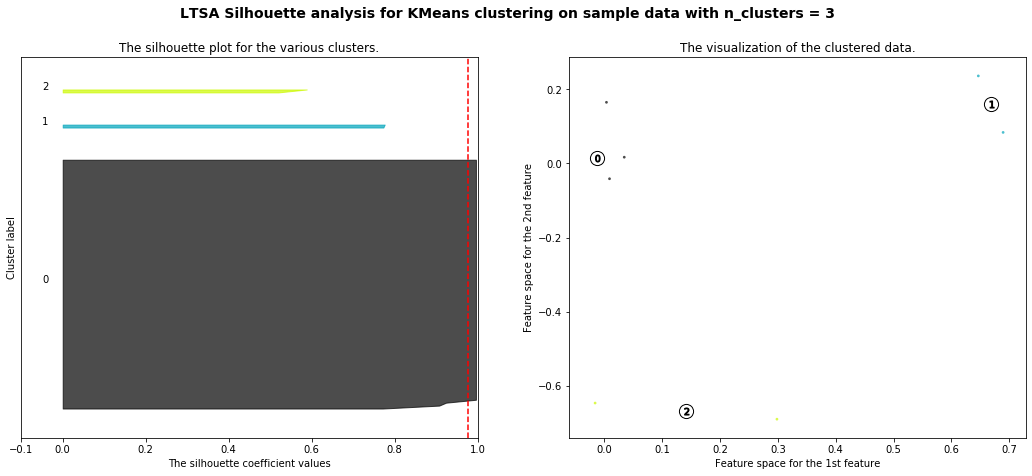

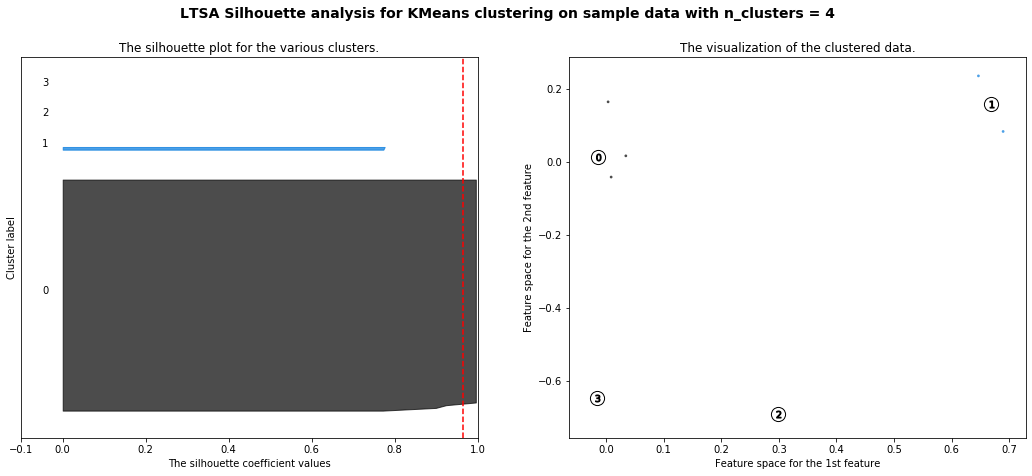

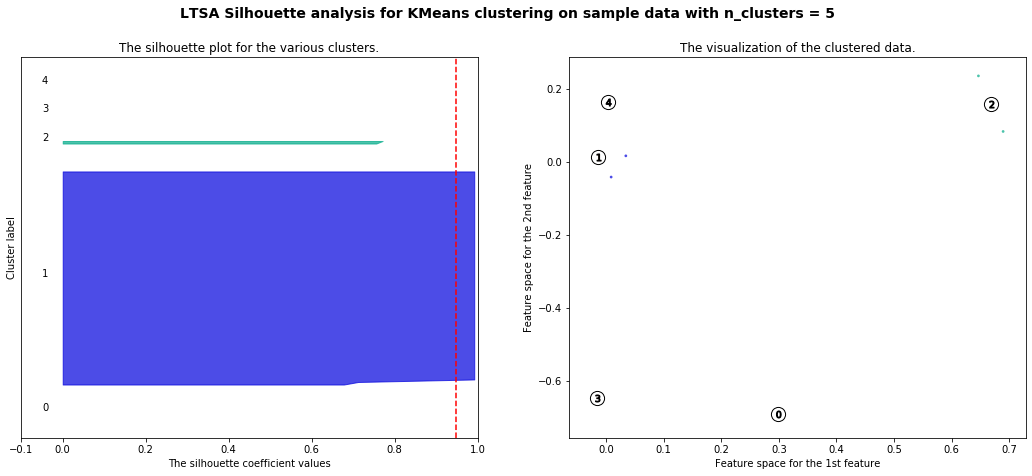

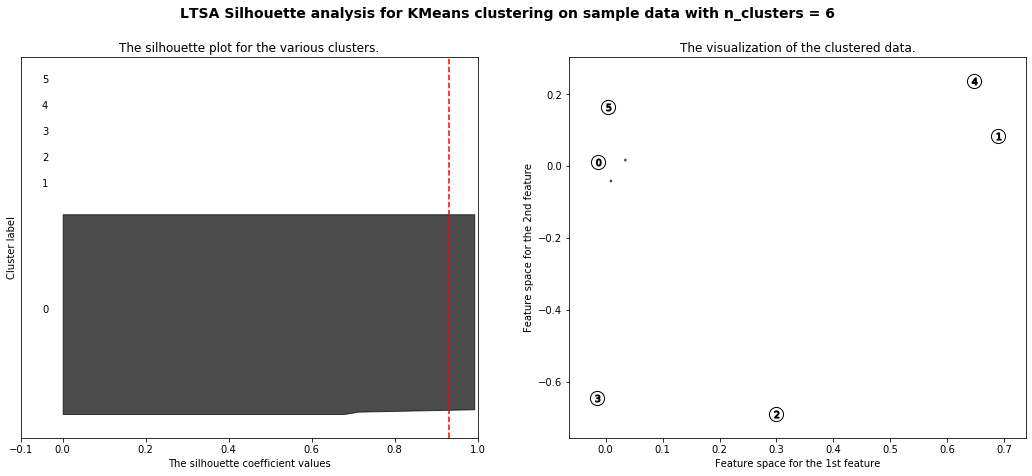

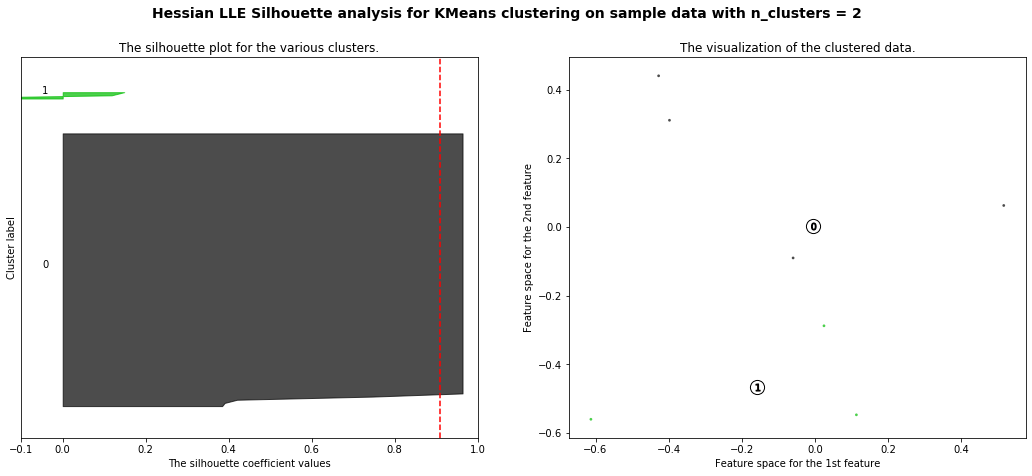

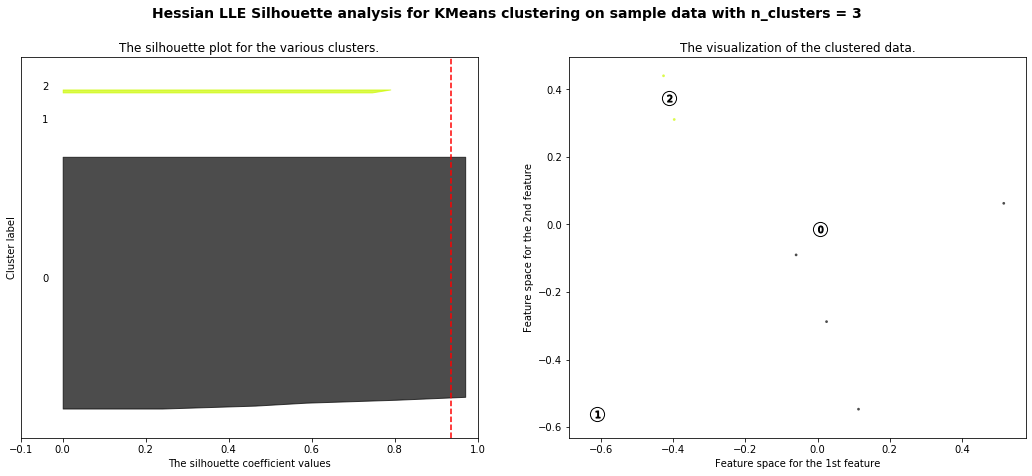

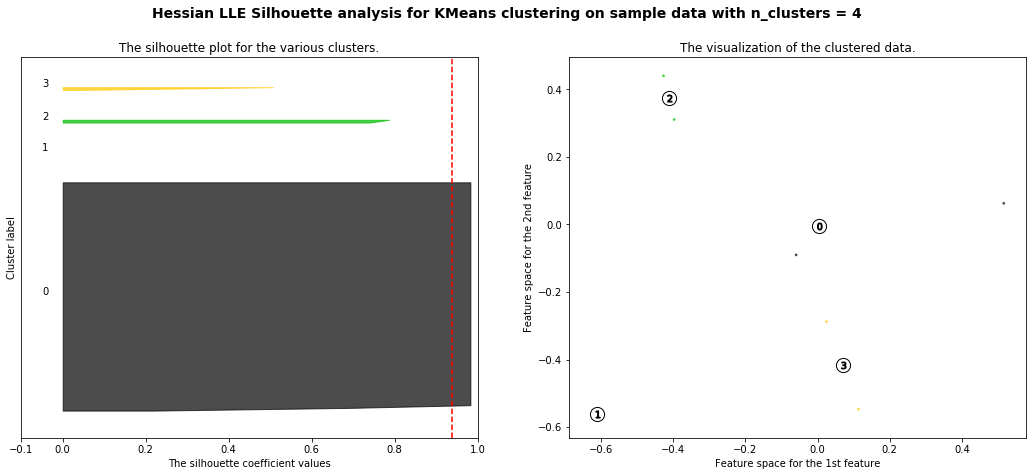

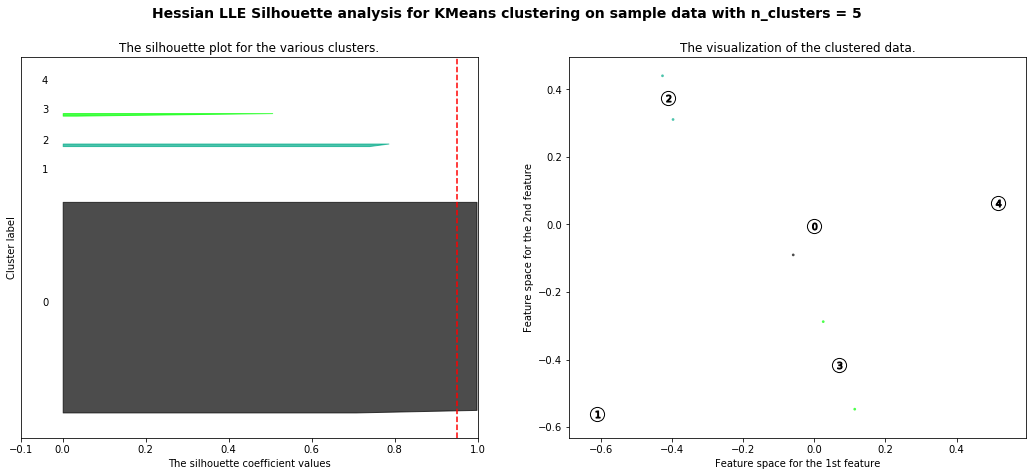

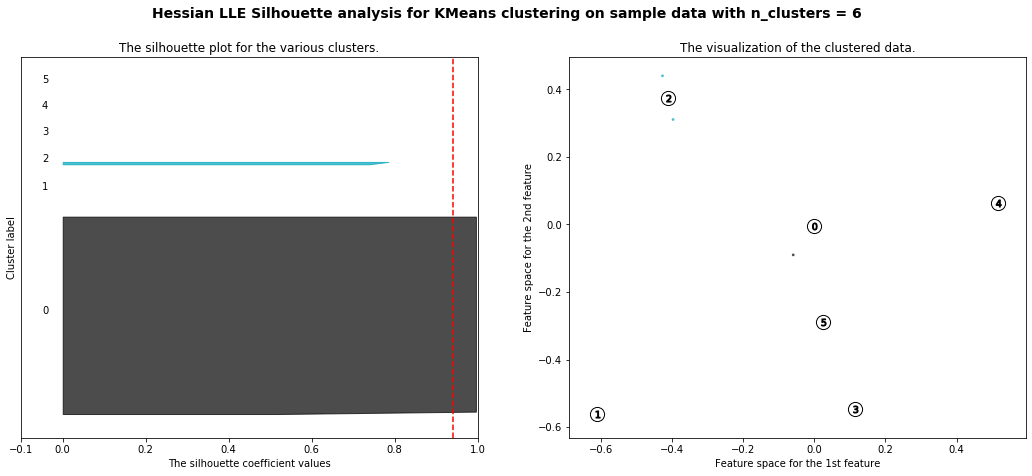

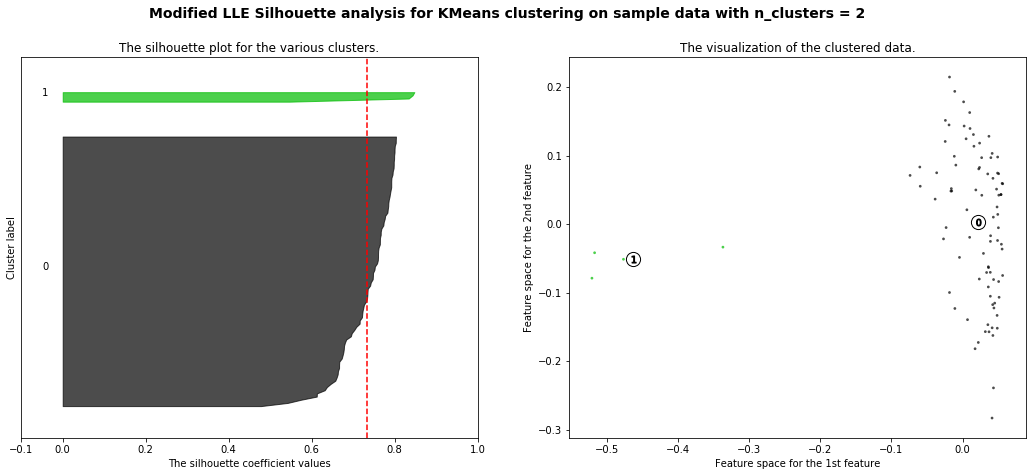

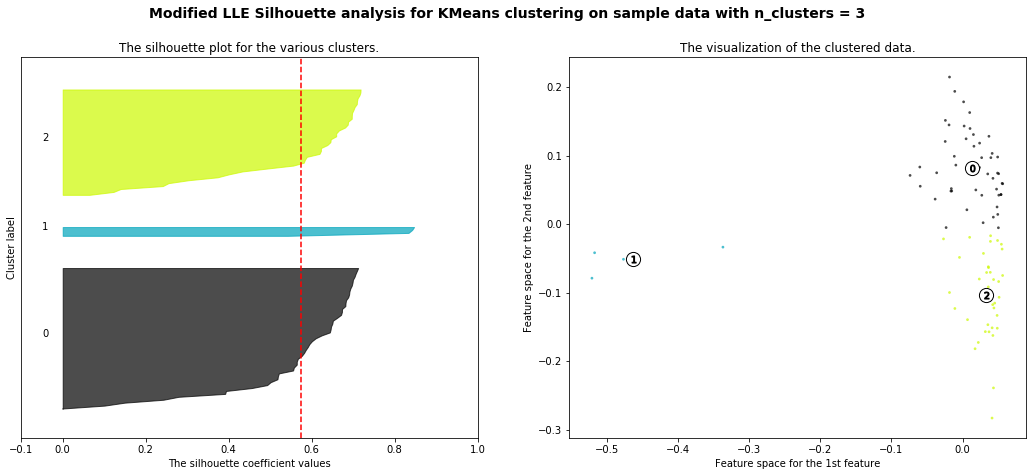

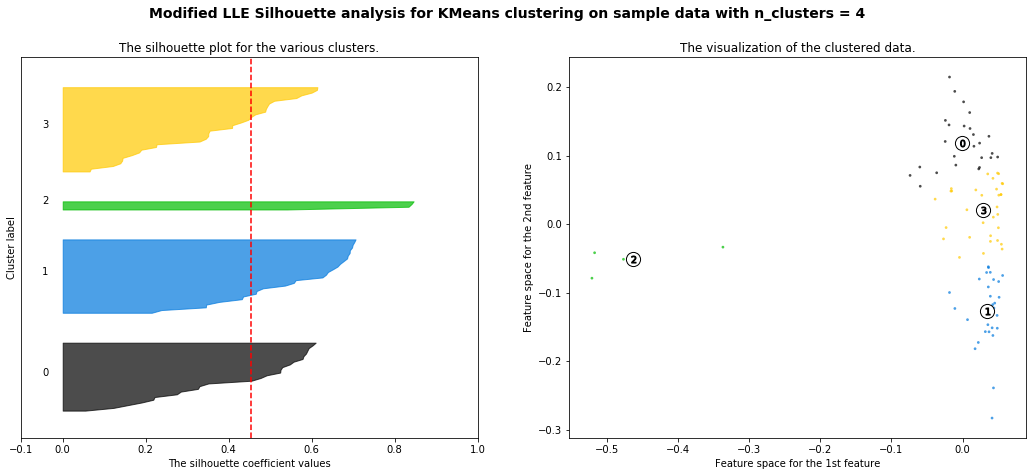

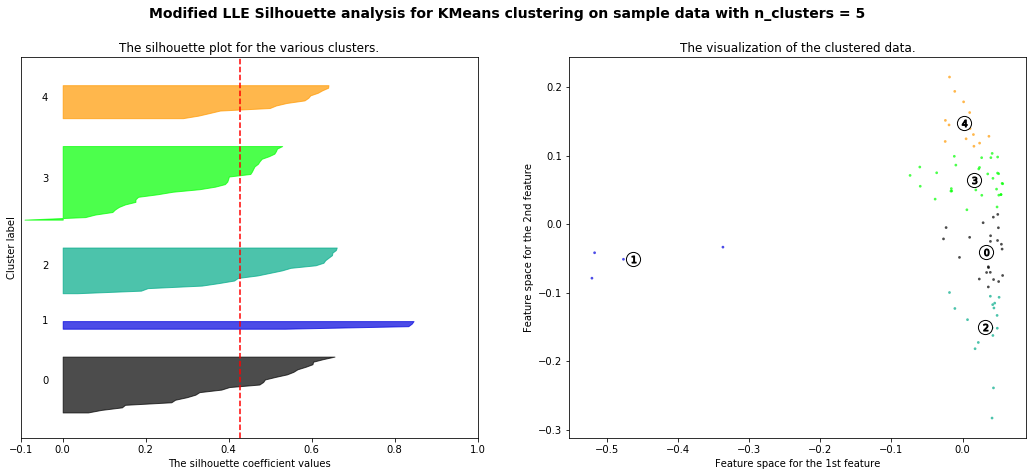

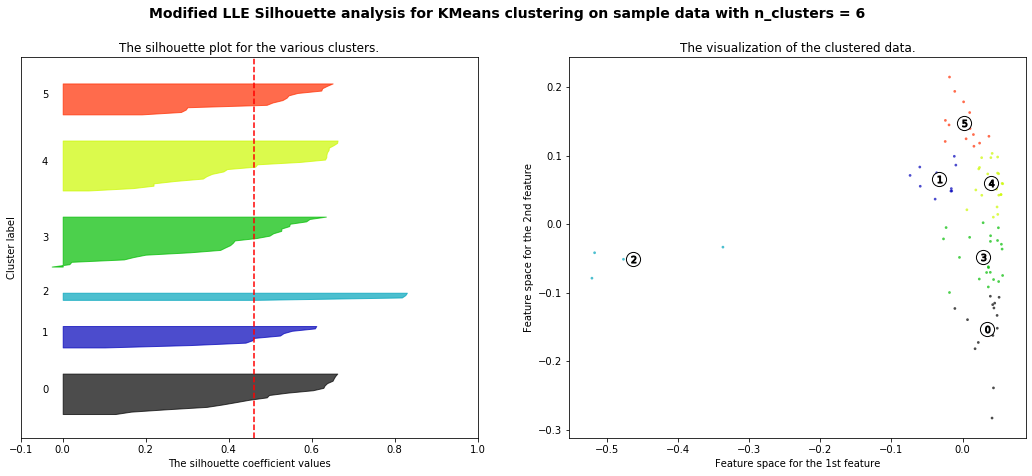

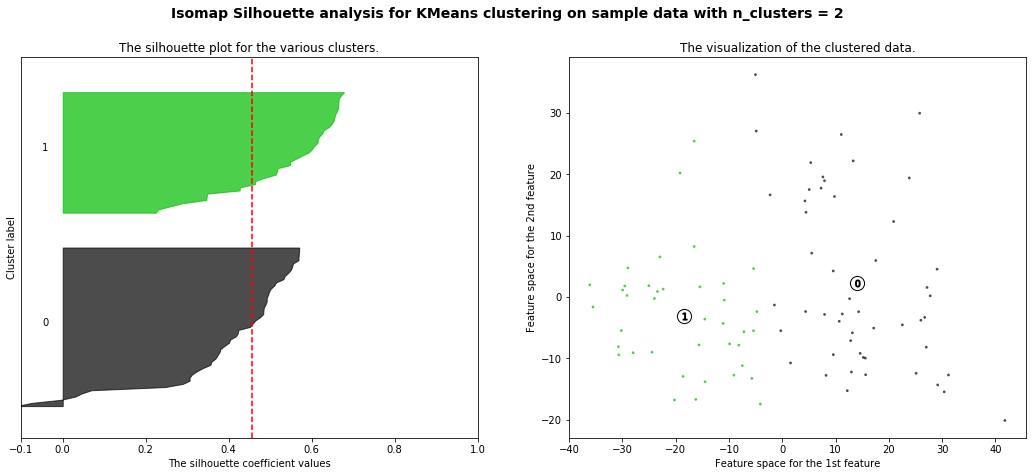

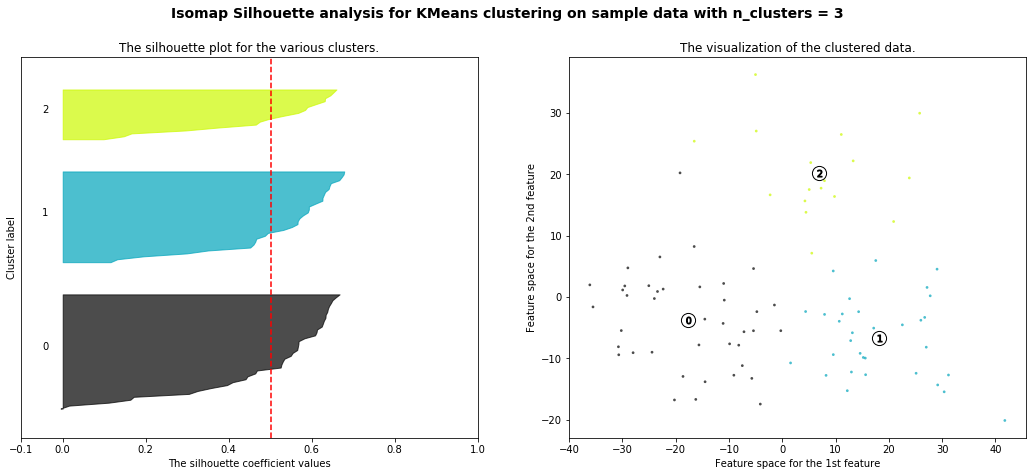

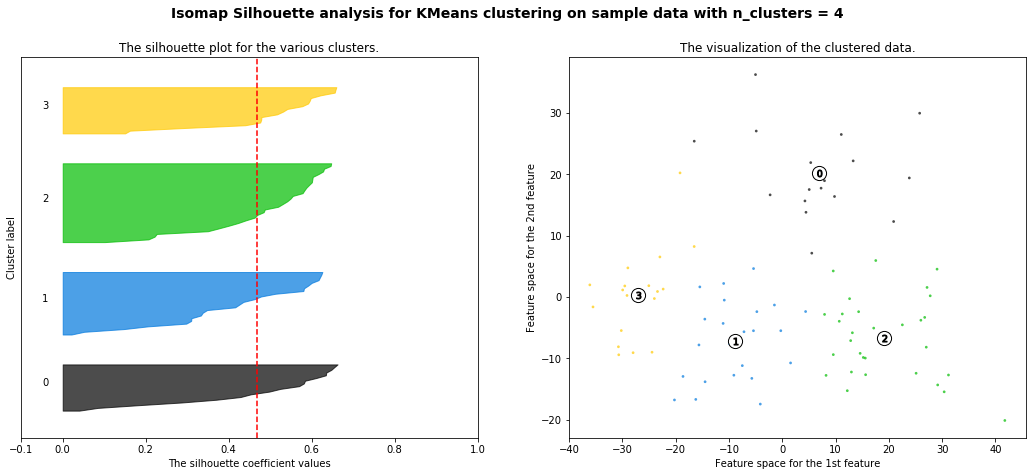

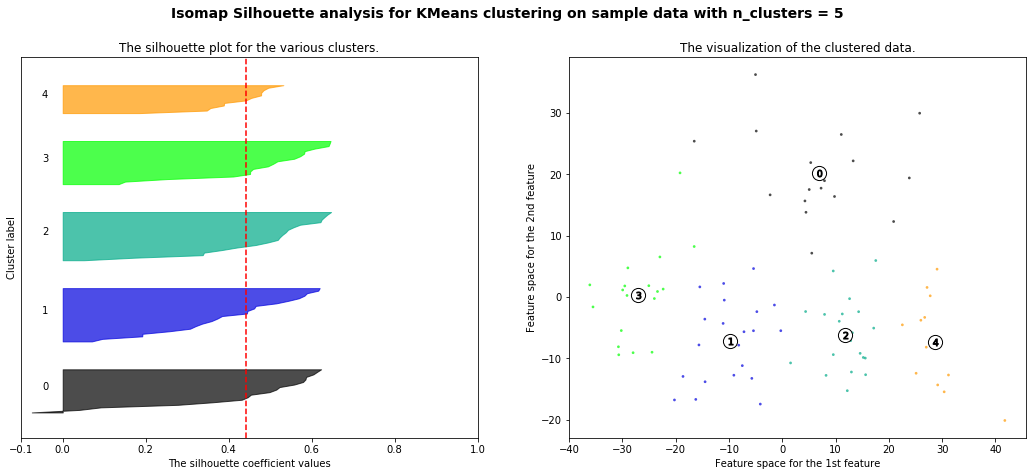

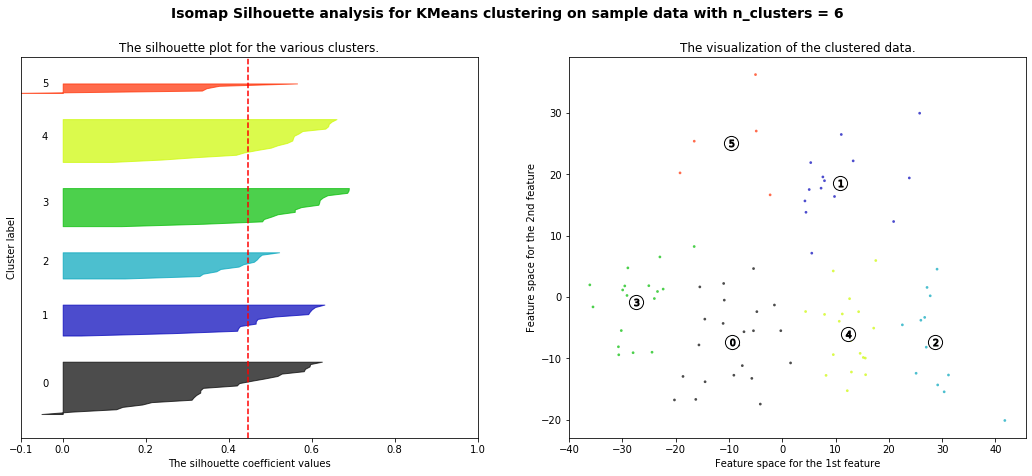

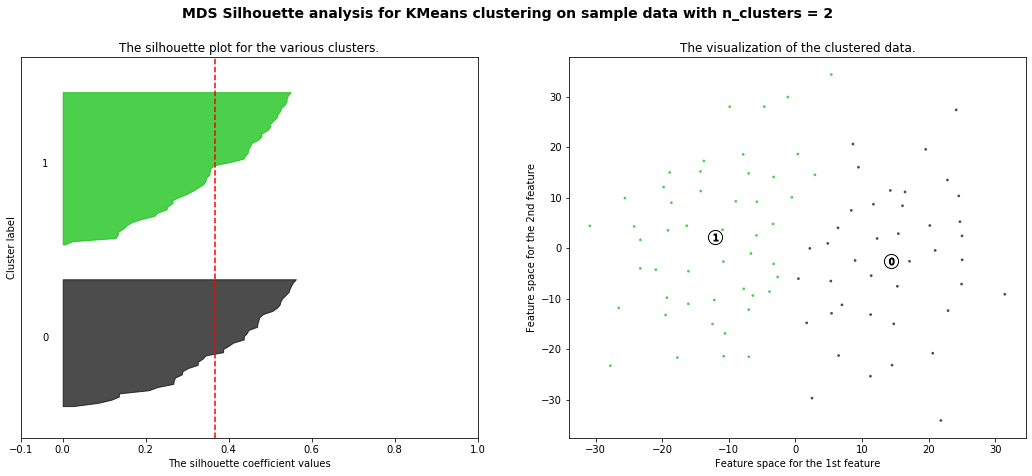

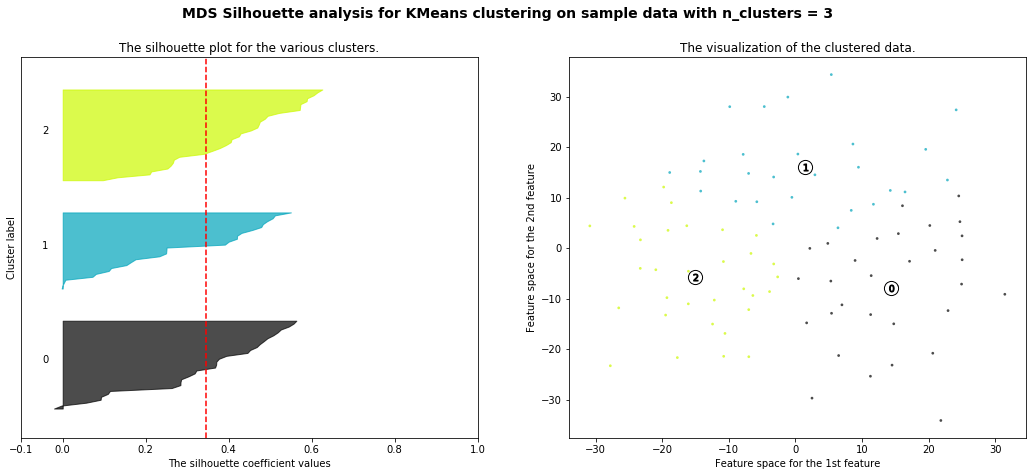

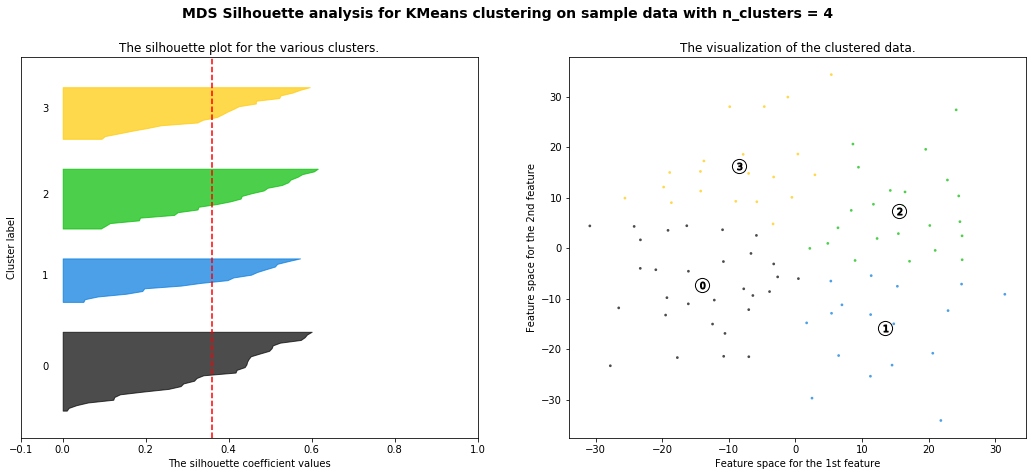

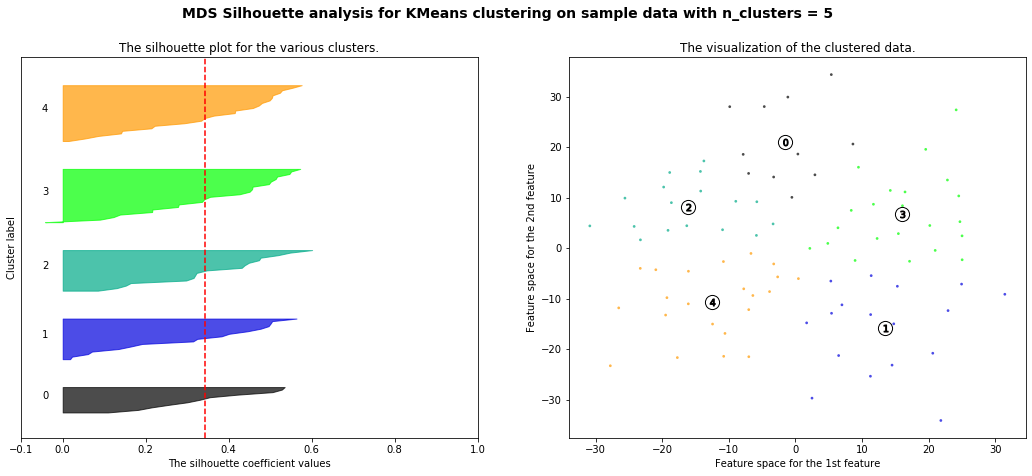

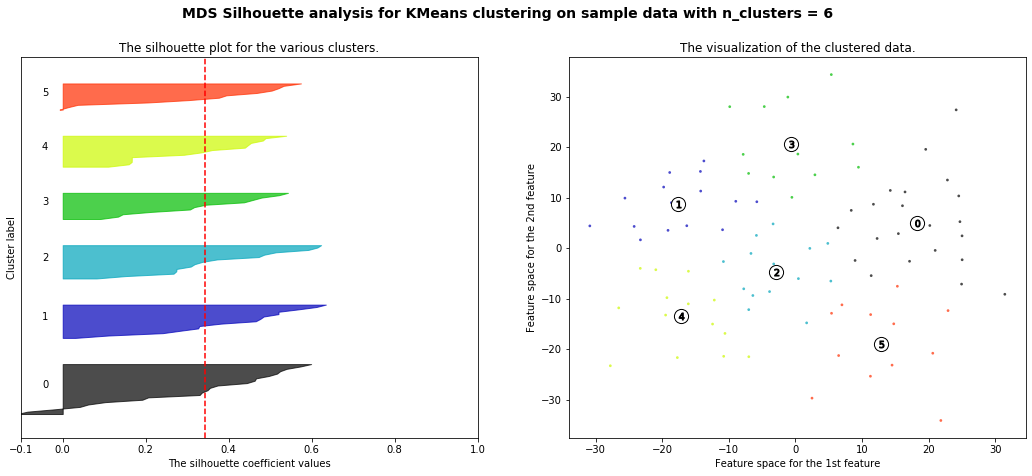

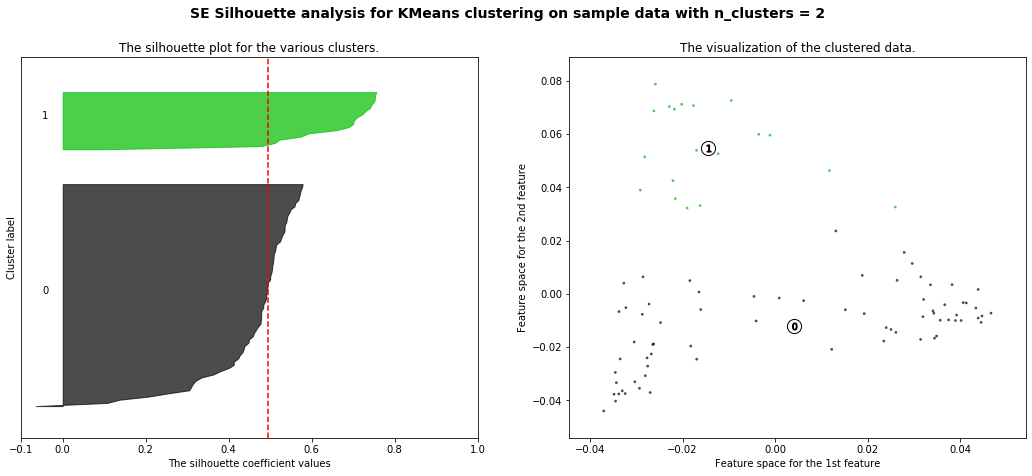

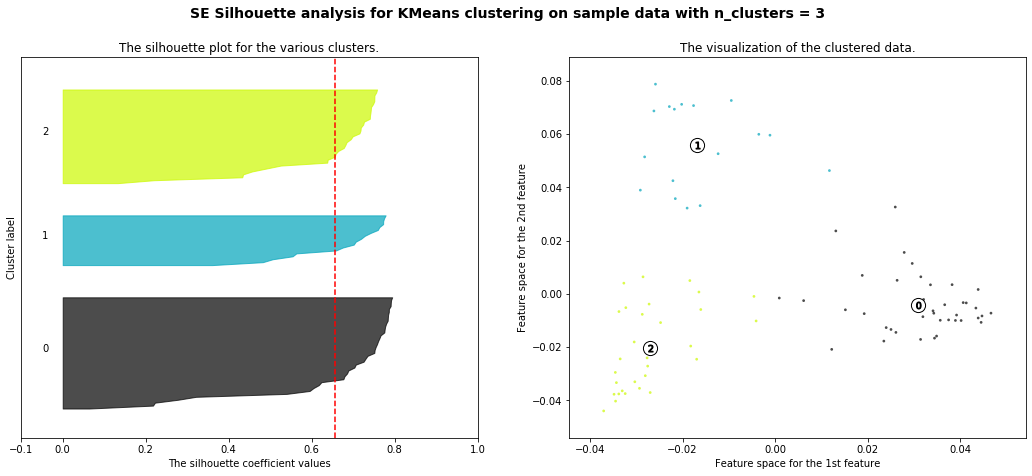

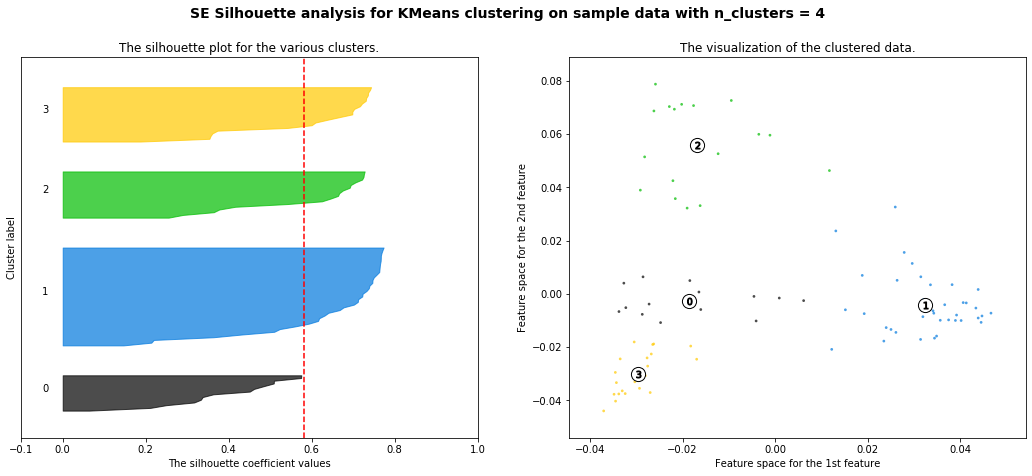

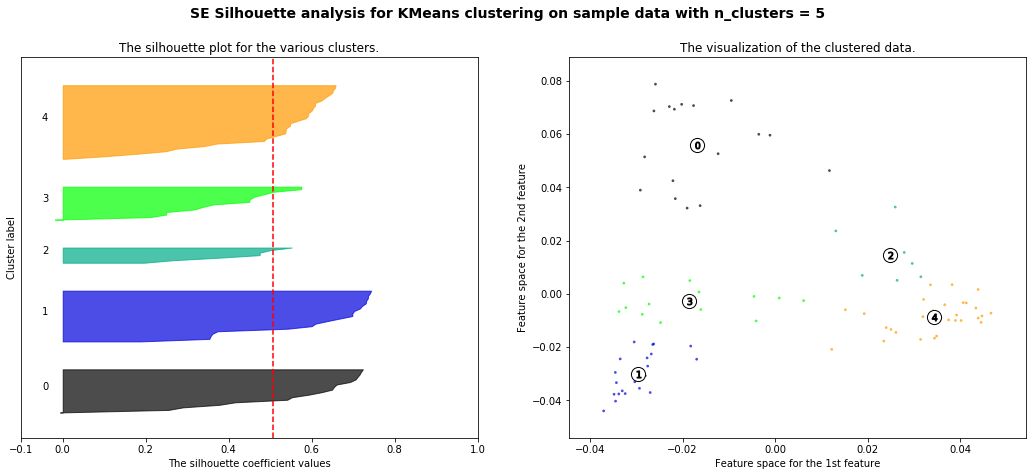

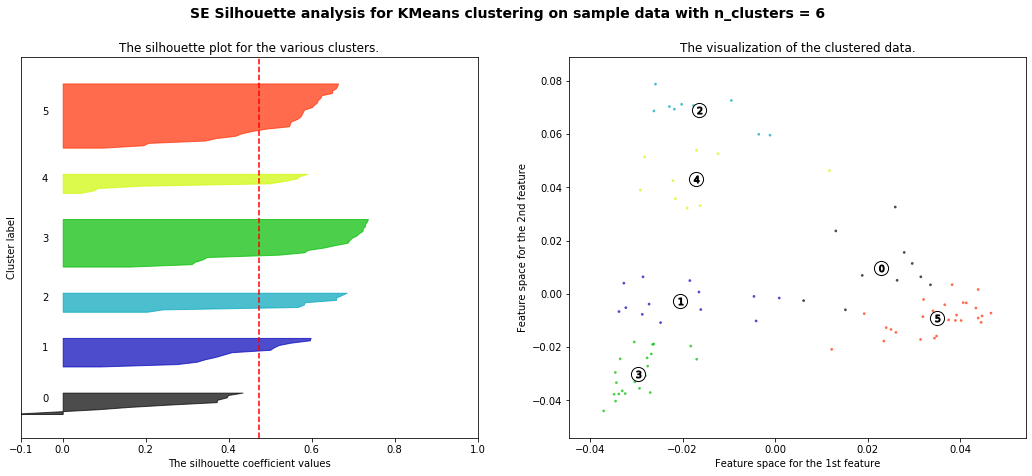

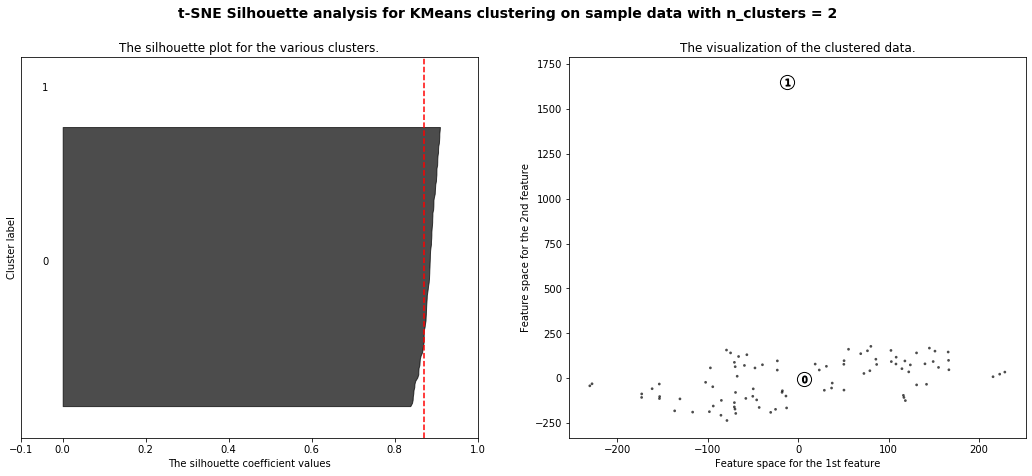

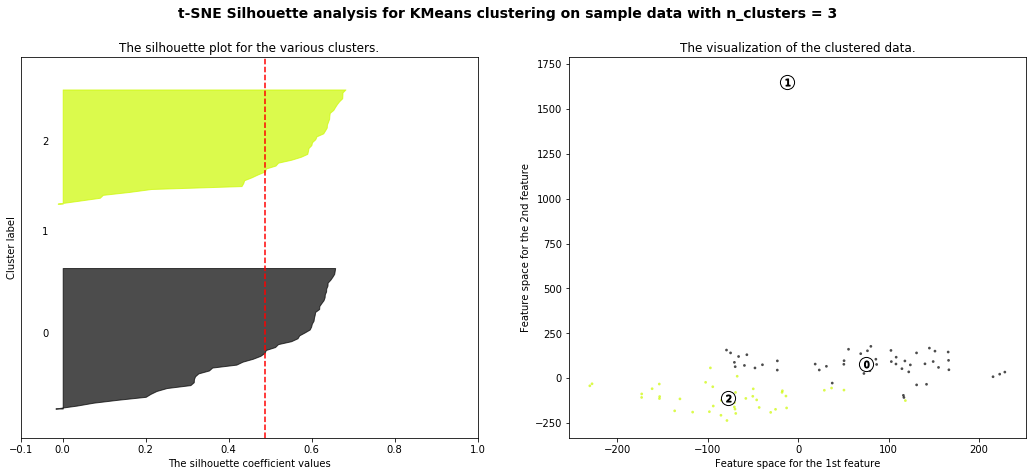

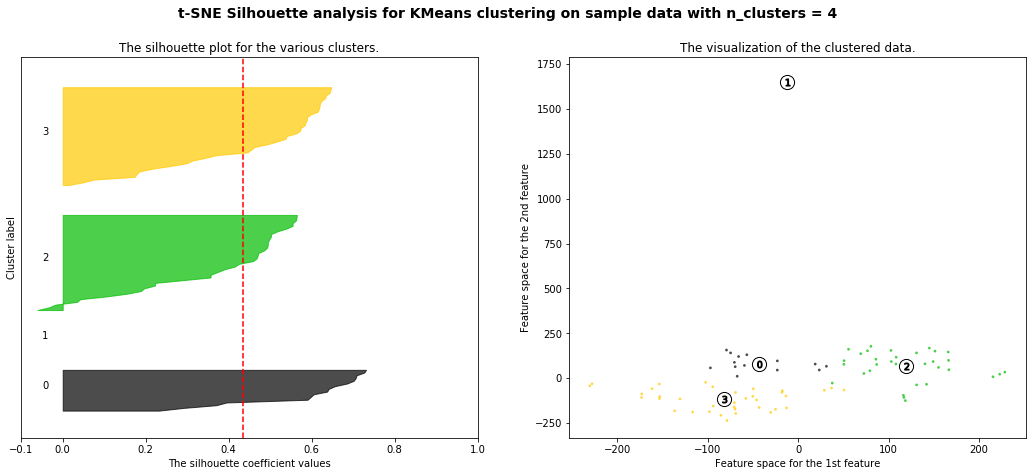

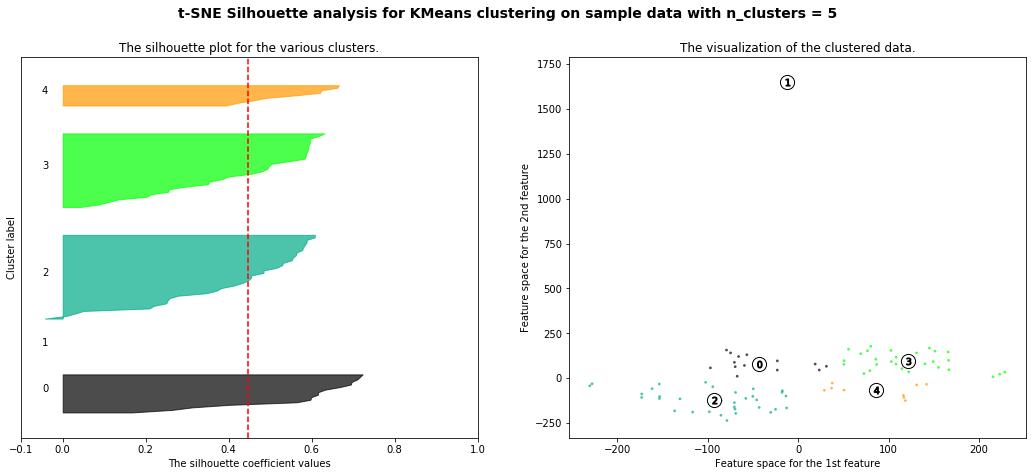

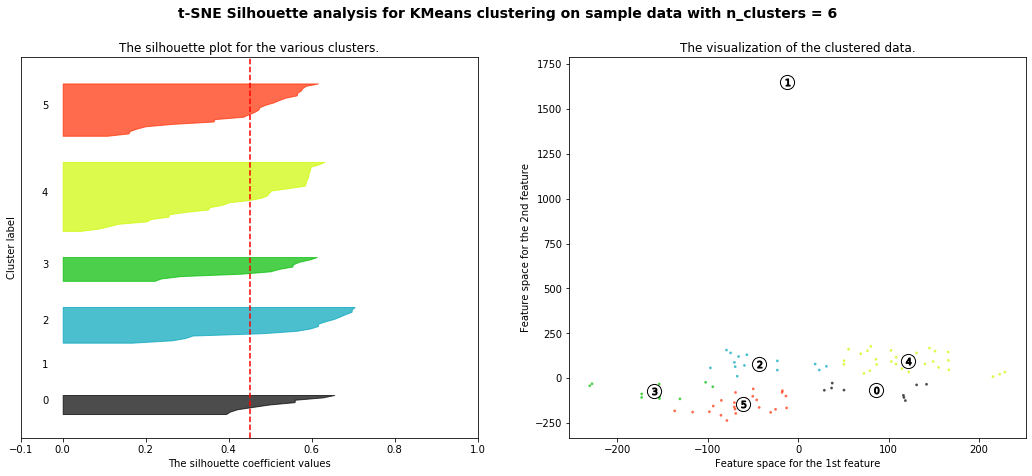

In [50]:
#methods['Isomap'].fit(x).reconstruction_error()

from collections import defaultdict
from sklearn.cluster import KMeans

results = defaultdict(int)

for dim in range (6):
    for meth in methods:
        methods[meth].fit_transform(x)

        
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for meth in methods:
    X = methods[meth].fit_transform(x)
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((meth + " Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

plt.show()

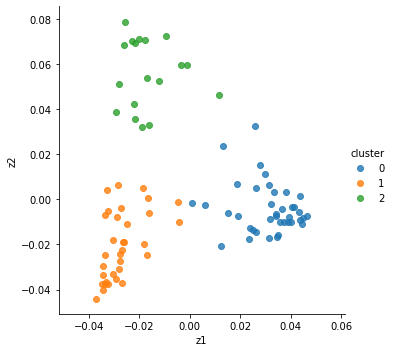

In [54]:
import seaborn as sns
tempy = methods['SE'].fit_transform(x)
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(methods['SE'].fit_transform(tempy))
kmdat = pd.DataFrame(data = tempy, columns = ['z1','z2'])
kmdat['cluster'] = cluster_labels
sns.lmplot('z1','z2', data = kmdat, hue = 'cluster', fit_reg = False)

In [ ]:
cluster_labels